In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
df=pd.read_csv('keyur_data.csv')
z=df[["district","NO3"]]
z=z.set_index("district")
z

,NO3
district,
ADILABAD,94.33770
ADILABAD,173.17390
ADILABAD,41.23399
ADILABAD,19.26615
ADILABAD,32.42028
...,...
YADADRI,436.69940
YADADRI,35.60916
YADADRI,14.70428


<Axes: xlabel='NO3', ylabel='TDS'>

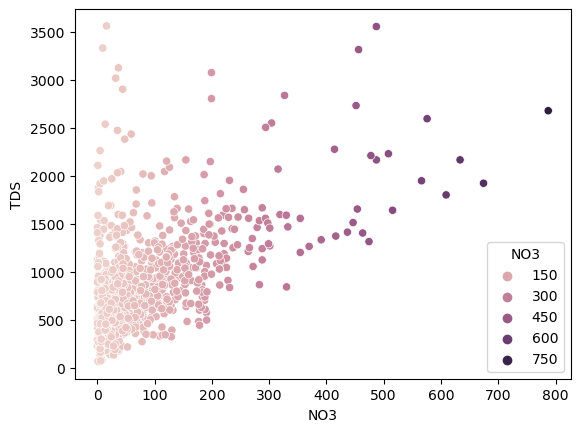

In [4]:
sns.scatterplot(x='NO3',y='TDS',data=df,hue='NO3')

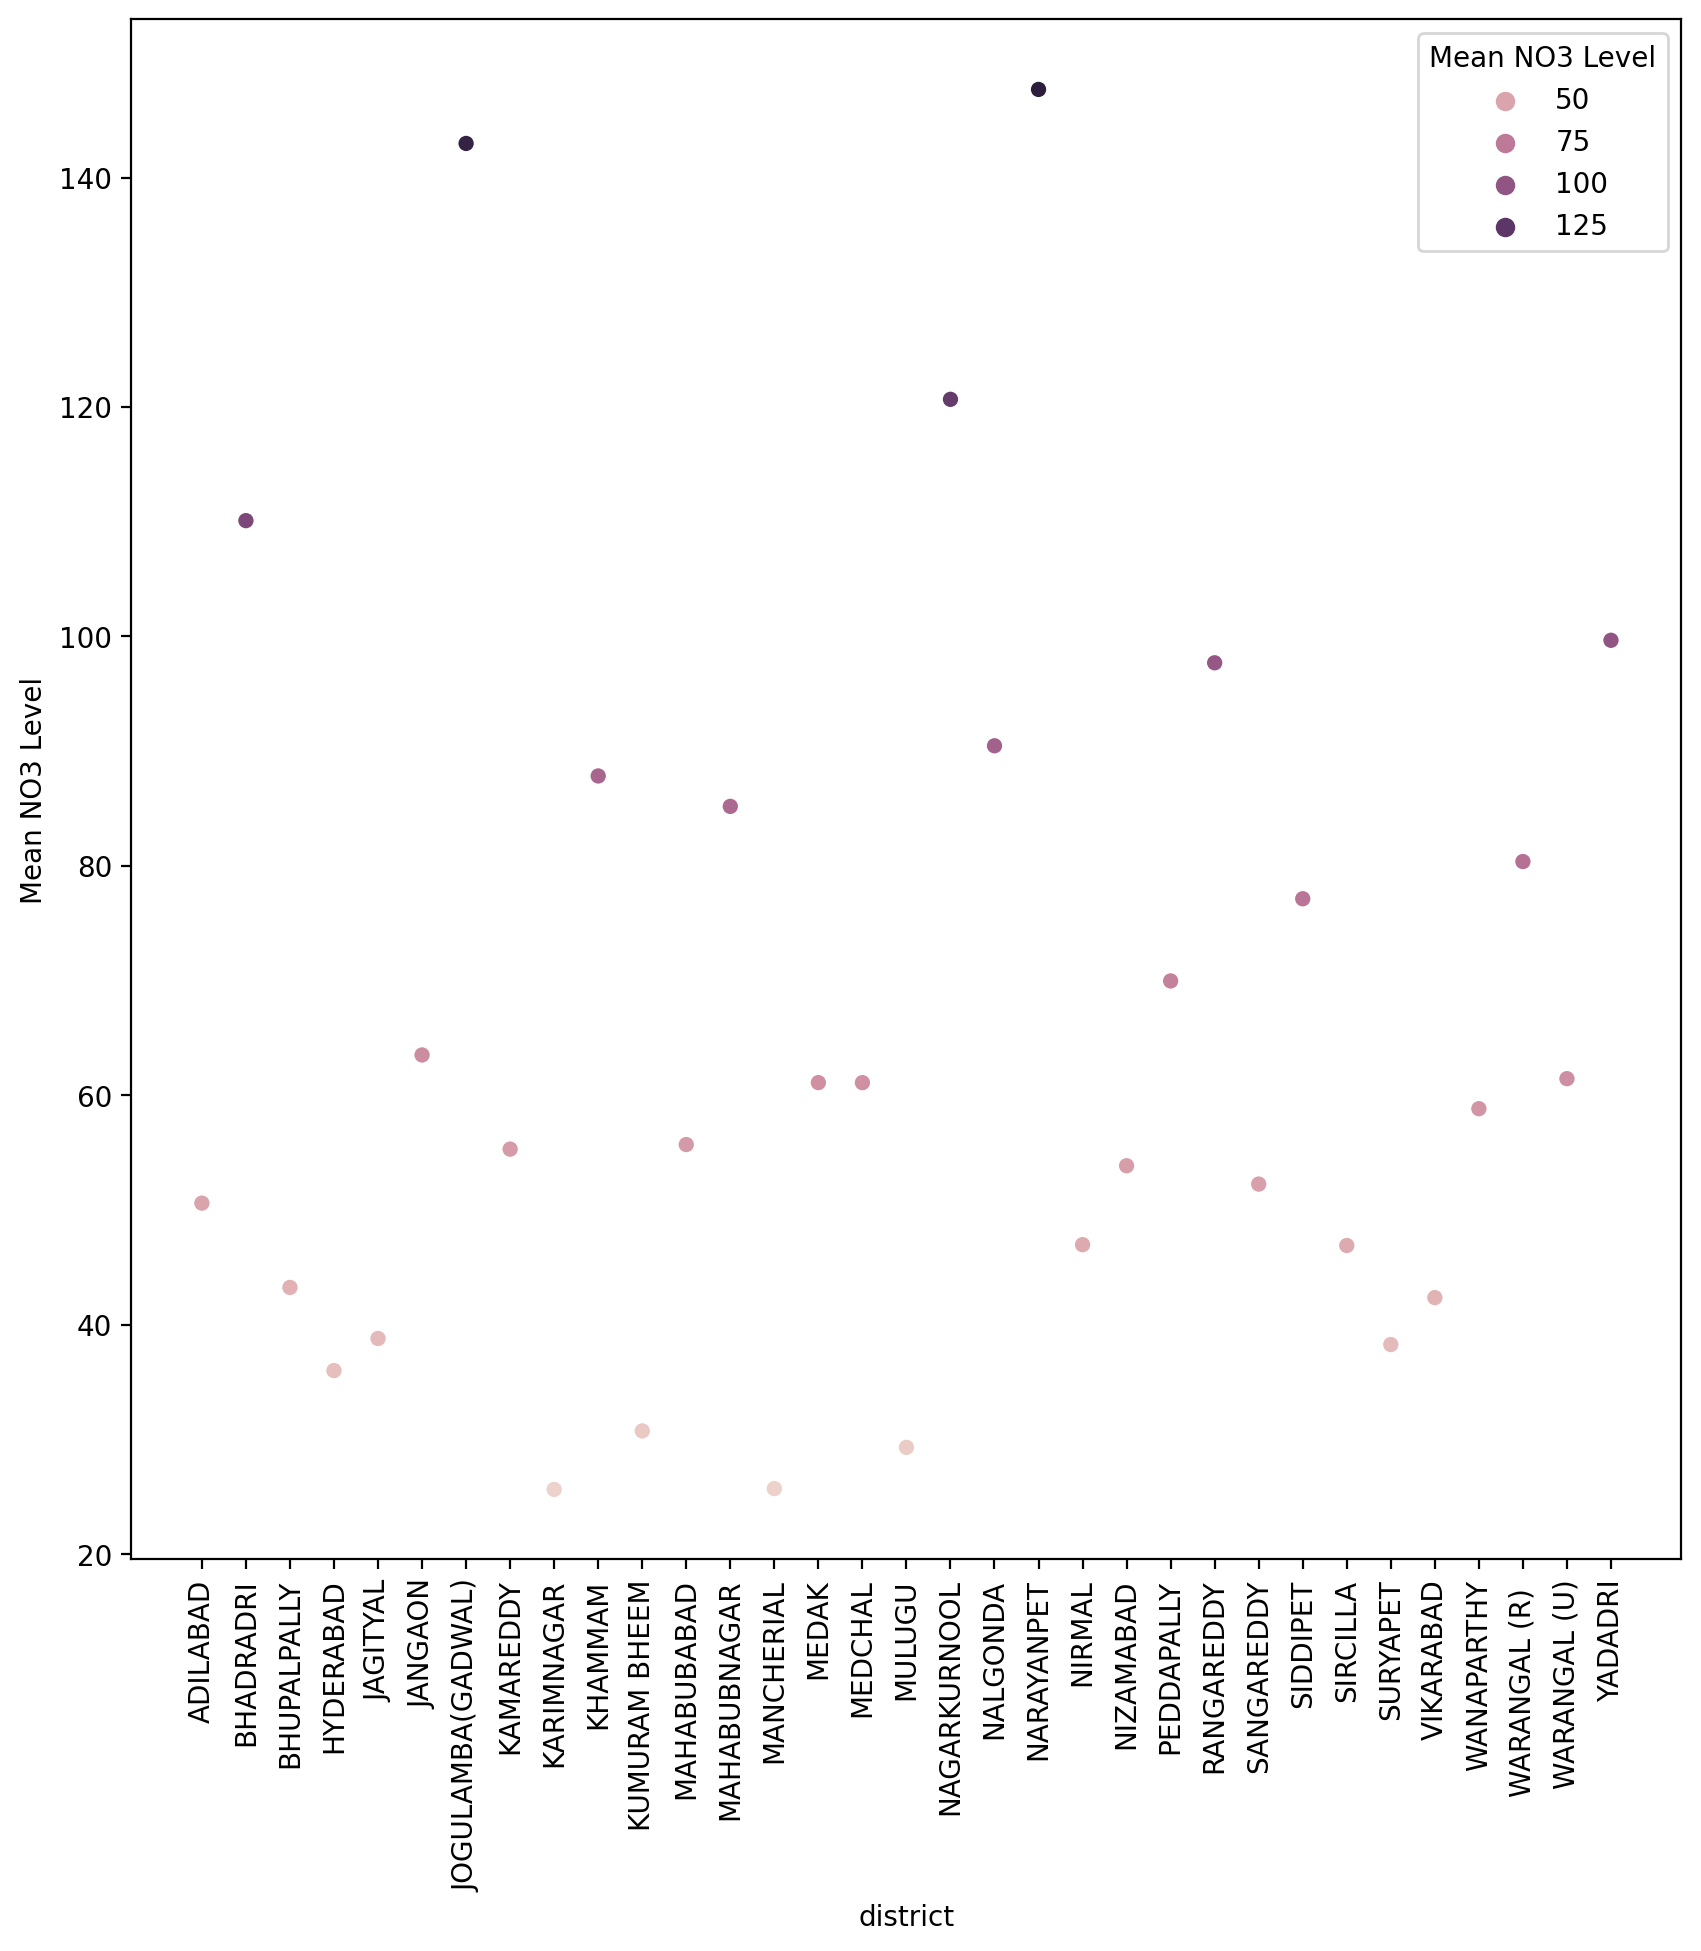

season,Pre-monsoon 2020,pre monsoon 2019,premonsoon 2018,Mean NO3 Level
district,,,,
ADILABAD,52.163778,35.297788,64.304159,50.588575
BHADRADRI,87.265536,87.920079,155.078271,110.087962
BHUPALPALLY,67.894557,39.357705,22.466102,43.239455
HYDERABAD,36.482306,38.573822,32.913006,35.989711
JAGITYAL,37.085685,34.378951,44.903733,38.789456
JANGAON,69.454773,60.999409,60.063567,63.505916
JOGULAMBA(GADWAL),117.147050,101.611326,210.156050,142.971475
KAMAREDDY,51.038952,50.073338,64.783616,55.298635
KARIMNAGAR,20.695509,30.721155,25.466750,25.627805


In [6]:
x=pd.pivot_table(data=df,index='district',columns='season',values='NO3')
x['Mean NO3 Level']=x.mean(axis=1)
plt.figure(figsize=(10,10),dpi=200)
sns.scatterplot(x='district',y='Mean NO3 Level',data=x,hue='Mean NO3 Level')
plt.xticks(rotation=90)
plt.show()
x

<Axes: xlabel='Mean NO3 Level', ylabel='Density'>

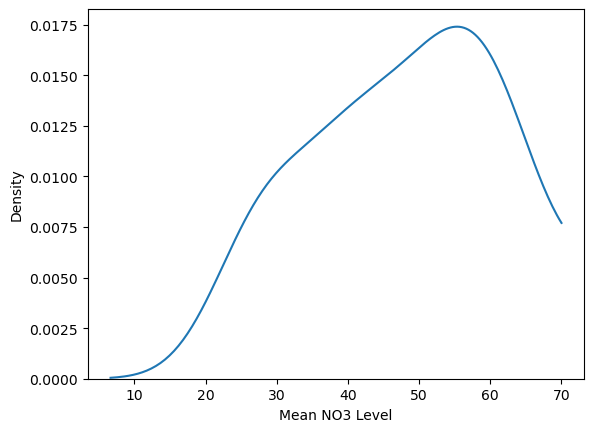

In [7]:
sns.kdeplot(x='Mean NO3 Level',data=x,clip=[-10,70],bw_adjust=0.4)

,NO3
district,
ADILABAD,94.33770
ADILABAD,173.17390
ADILABAD,41.23399
ADILABAD,19.26615
ADILABAD,32.42028
...,...
YADADRI,436.69940
YADADRI,35.60916
YADADRI,14.70428


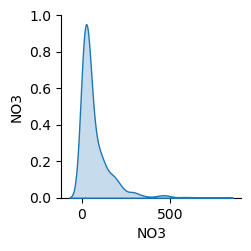

In [8]:
sns.pairplot(z,diag_kind="kde")
z

In [12]:
z["Mean NO3 Level"]=x["Mean NO3 Level"]
X=z.drop("Mean NO3 Level",axis=1)
y=z
X=X.reset_index()
y=y.reset_index()
y=y.drop("district",axis=1)
X=X.drop("district",axis=1)
X
y

,NO3,Mean NO3 Level
0,94.33770,50.588575
1,173.17390,50.588575
2,41.23399,50.588575
3,19.26615,50.588575
4,32.42028,50.588575
...,...,...
1084,436.69940,99.657296
1085,35.60916,99.657296
1086,14.70428,99.657296
1087,36.89357,99.657296


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
predict=model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
MAE=mean_absolute_error(y_test,predict)
RMSE=np.sqrt(mean_squared_error(y_test,predict))
MAE

11.899616217557723

In [19]:
RMSE

20.33524220549547

In [20]:
test_res=y_test-predict

In [21]:
test_res

,NO3,Mean NO3 Level
1030,1.065814e-14,-28.290464
325,7.105427e-15,-26.131366
420,1.065814e-14,-27.461553
32,1.065814e-14,-30.587465
327,7.105427e-15,-27.026135
...,...,...
614,0.000000e+00,-15.921316
228,0.000000e+00,-33.304395
1053,7.105427e-15,-8.664866
935,1.332268e-14,25.064921


In [22]:
y_test

,NO3,Mean NO3 Level
1030,16.117131,38.260022
325,35.675595,42.351295
420,13.085682,38.789456
32,16.387300,35.989711
327,44.732900,42.351295
...,...,...
614,48.719000,53.849900
228,155.015000,46.967776
1053,25.599620,58.822393
935,4.429000,90.460739


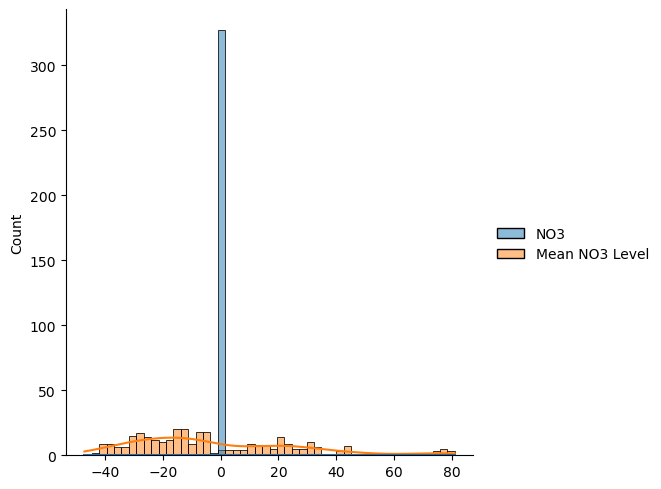

In [23]:
sns.displot(test_res,bins=50,kde=True)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly = PolynomialFeatures(degree=2,include_bias=False)

In [26]:
new_features = poly.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(new_features, y, test_size=0.3, random_state=101)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression(fit_intercept=True)

In [31]:
model.fit(X_train,y_train)

LinearRegression()

In [37]:
test_predictions = model.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,test_predictions)
mse = mean_squared_error(y_test,test_predictions)
rmse = np.sqrt(mse)

In [40]:
mae

11.785835764548697

In [41]:
rmse

20.364322435232605

In [42]:
Test_res=y_test-test_pred
Test_res

,NO3,Mean NO3 Level
1030,2.131628e-14,-26.657044
325,1.421085e-14,-25.628022
420,2.309264e-14,-25.642551
32,2.131628e-14,-28.970448
327,7.105427e-15,-27.006652
...,...,...
614,7.105427e-15,-16.106862
228,-2.842171e-14,-37.172466
1053,1.776357e-14,-7.593886
935,2.664535e-14,27.429282


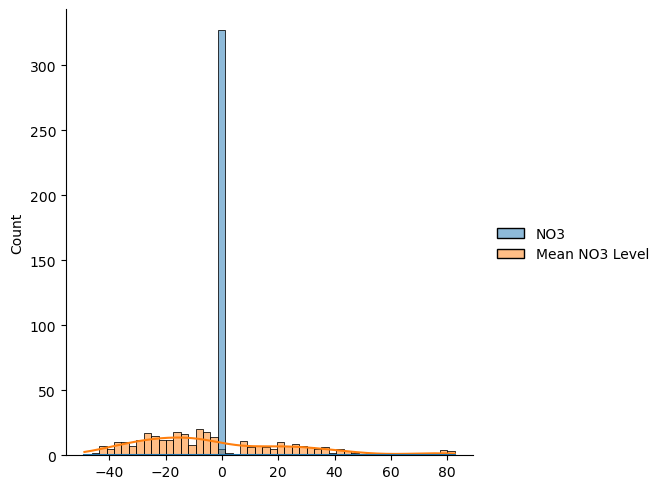

In [43]:
sns.displot(Test_res,bins=50,kde=True)